In [1]:
from numpy import load
import cv2

In [2]:
data = load('dermamnist.npz')
lst = data.files
for item in lst:
    print(item)
    print(data[item])

train_images
[[[[158 111 117]
   [161 116 121]
   [164 121 130]
   ...
   [189 160 164]
   [187 158 160]
   [186 157 159]]

  [[160 113 119]
   [165 120 125]
   [170 129 137]
   ...
   [191 162 166]
   [189 160 162]
   [188 159 161]]

  [[164 119 124]
   [170 128 132]
   [177 137 145]
   ...
   [191 162 166]
   [188 162 165]
   [187 161 164]]

  ...

  [[172 142 150]
   [176 147 152]
   [182 150 155]
   ...
   [195 167 164]
   [181 153 150]
   [171 143 140]]

  [[176 147 152]
   [176 147 152]
   [180 148 153]
   ...
   [188 160 157]
   [178 150 147]
   [171 143 140]]

  [[175 146 151]
   [173 144 149]
   [174 142 147]
   ...
   [180 152 149]
   [175 147 144]
   [173 145 142]]]


 [[[230 111 105]
   [226 107  99]
   [225 106  98]
   ...
   [217 113 102]
   [215 111 100]
   [213 109  98]]

  [[225 106 100]
   [221 102  94]
   [220 102  92]
   ...
   [218 114 103]
   [216 112 101]
   [215 111 100]]

  [[222 103  97]
   [218  99  91]
   [217 100  90]
   ...
   [219 115 104]
   [217 115 103

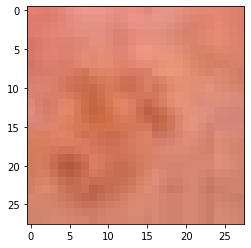

In [6]:
from matplotlib import pyplot as plt
plt.imshow(data['train_images'][3])


In [7]:
lst

['train_images',
 'val_images',
 'test_images',
 'train_labels',
 'val_labels',
 'test_labels']

In [75]:
data['train_images'][0]

array([[[158, 111, 117],
        [161, 116, 121],
        [164, 121, 130],
        ...,
        [189, 160, 164],
        [187, 158, 160],
        [186, 157, 159]],

       [[160, 113, 119],
        [165, 120, 125],
        [170, 129, 137],
        ...,
        [191, 162, 166],
        [189, 160, 162],
        [188, 159, 161]],

       [[164, 119, 124],
        [170, 128, 132],
        [177, 137, 145],
        ...,
        [191, 162, 166],
        [188, 162, 165],
        [187, 161, 164]],

       ...,

       [[172, 142, 150],
        [176, 147, 152],
        [182, 150, 155],
        ...,
        [195, 167, 164],
        [181, 153, 150],
        [171, 143, 140]],

       [[176, 147, 152],
        [176, 147, 152],
        [180, 148, 153],
        ...,
        [188, 160, 157],
        [178, 150, 147],
        [171, 143, 140]],

       [[175, 146, 151],
        [173, 144, 149],
        [174, 142, 147],
        ...,
        [180, 152, 149],
        [175, 147, 144],
        [173, 145, 142]]

In [9]:
import pywt

In [41]:
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']


In [106]:
def dwt_take(image,wavelet):
    (blue,green,red)=cv2.split(image)
    coffes_red=pywt.dwt2(red,wavelet)
    coffes_green=pywt.dwt2(green,wavelet)
    coffes_blue=pywt.dwt2(blue,wavelet)
    LLr,(LHr, HLr, HHr)=coffes_red
    LLg,(LHg, HLg, HHg)=coffes_green
    LLb,(LHb, HLb, HHb)=coffes_blue
    LL=cv2.merge([LLb, LLg, LLr])
    HL=cv2.merge([HLb, HLg, HLr])
    LH=cv2.merge([LHb, LHg, LHr])
    HH=cv2.merge([HHb, HHg, HHr])
    LL=cv2.normalize(LL,None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    HL=cv2.normalize(HL,None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    LH=cv2.normalize(LH,None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    HH=cv2.normalize(HH,None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
    fig = plt.figure(figsize=(12, 3))
    for i, a in enumerate([LL, LH, HL, HH]):
        ax = fig.add_subplot(1, 4, i + 1)
        ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
        ax.set_title(titles[i], fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])

    fig.tight_layout()
    plt.show()
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


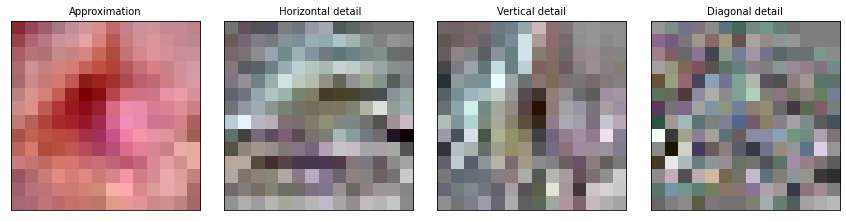

In [108]:
dwt_take(data['train_images'][0],'haar')

In [109]:
def dwt_take2(image,wavelet):
    (blue,green,red)=cv2.split(image)
    coffes_red=pywt.dwt2(red,wavelet)
    coffes_green=pywt.dwt2(green,wavelet)
    coffes_blue=pywt.dwt2(blue,wavelet)
    LLr,(LHr, HLr, HHr)=coffes_red
    LLg,(LHg, HLg, HHg)=coffes_green
    LLb,(LHb, HLb, HHb)=coffes_blue
    fig = plt.figure(figsize=(12, 3))
    for i, a in enumerate([LLr,LHr, HLr, HHr]):
        ax = fig.add_subplot(1, 4, i + 1)
        ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
        ax.set_title(titles[i], fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
    fig.tight_layout()
    plt.show()
    fig = plt.figure(figsize=(12, 3))
    for i, a in enumerate([LLg,LHg, HLg, HHg]):
        ax = fig.add_subplot(1, 4, i + 1)
        ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
        ax.set_title(titles[i], fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
    fig.tight_layout()
    plt.show()
    fig = plt.figure(figsize=(12, 3))
    for i, a in enumerate([LLb,LHb, HLb, HHb]):
        ax = fig.add_subplot(1, 4, i + 1)
        ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
        ax.set_title(titles[i], fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
    fig.tight_layout()
    plt.show()

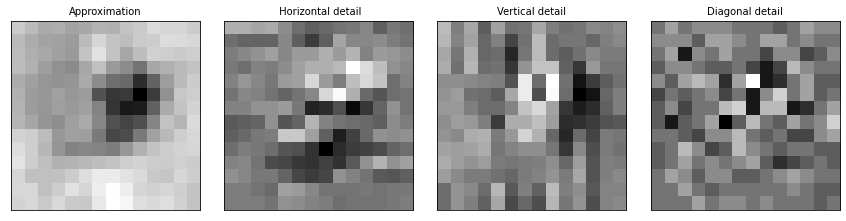

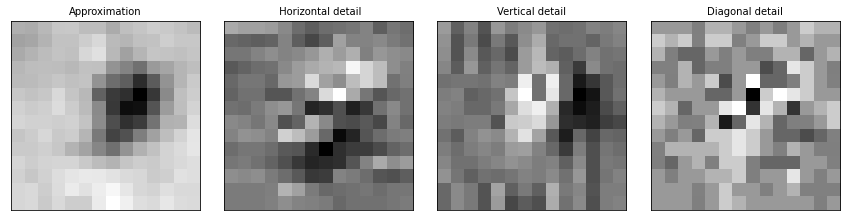

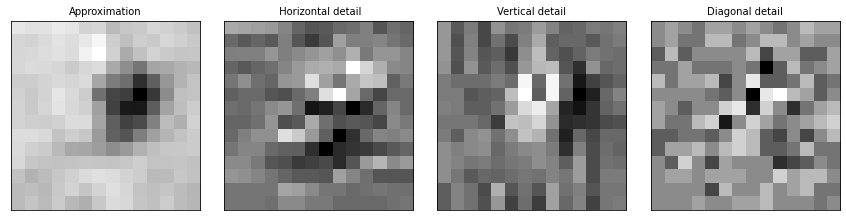

In [110]:
dwt_take2(data['train_images'][1],'haar')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


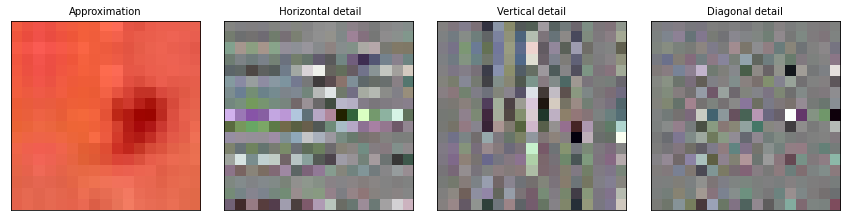

In [119]:
dwt_take(data['train_images'][1],'db4')